# Hidden Markov Models

Imagine you have a very lazy fat dog, so we define the state space as sleeping, eating, or pooping. We will set the initial probabilities to 35%, 35%, and 30% respectively.

In [39]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# create state space and initial state probabilities

states = ['sleeping', 'eating', 'pooping']
pi = [0.35, 0.35, 0.3]
state_space = pd.Series(pi, index=states, name='states')
print(state_space)
print(state_space.sum())


sleeping    0.35
eating      0.35
pooping     0.30
Name: states, dtype: float64
1.0


The next step is to define the transition probabilities. They are simply the probabilities of staying in the same state or moving to a different state given the current state. 


In [40]:
# create transition matrix
# equals transition probability matrix of changing states given a state
# matrix is size (M x M) where M is number of states

q_df = pd.DataFrame(columns=states, index=states)
q_df.loc[states[0]] = [0.4, 0.2, 0.4]
q_df.loc[states[1]] = [0.45, 0.45, 0.1]
q_df.loc[states[2]] = [0.45, 0.25, .3]

print(q_df)

q = q_df.values
print('\n', q, q.shape, '\n')
print(q_df.sum(axis=1))

         sleeping eating pooping
sleeping      0.4    0.2     0.4
eating       0.45   0.45     0.1
pooping      0.45   0.25     0.3
('\n', array([[0.4, 0.2, 0.4],
       [0.45, 0.45, 0.1],
       [0.45, 0.25, 0.3]], dtype=object), (3, 3), '\n')
sleeping    1.0
eating      1.0
pooping     1.0
dtype: float64


Now that we have the initial and transition probabilities setup we can create a Markov diagram using the Networkx package.

To do this requires a little bit of flexible thinking. Networkx creates Graphs that consist of nodes and edges. In our toy example the dog's possible states are the nodes and the edges are the lines that connect the nodes. The transition probabilities are the weights. They represent the probability of transitioning to a state given the current state.

Something to note is networkx deals primarily with dictionary objects. With that said, we need to create a dictionary object that holds our edges and their weights.

In [41]:
from pprint import pprint 

# create a function that maps transition probability dataframe 
# to markov edges and weights

def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges

edges_wts = _get_markov_edges(q_df)
pprint(edges_wts)


{('eating', 'eating'): 0.45,
 ('eating', 'pooping'): 0.1,
 ('eating', 'sleeping'): 0.45,
 ('pooping', 'eating'): 0.25,
 ('pooping', 'pooping'): 0.3,
 ('pooping', 'sleeping'): 0.45,
 ('sleeping', 'eating'): 0.2,
 ('sleeping', 'pooping'): 0.4,
 ('sleeping', 'sleeping'): 0.4}


Now we can create the graph. To visualize a Markov model we need to use nx.MultiDiGraph(). A multidigraph is simply a directed graph which can have multiple arcs such that a single node can be both the origin and destination. 

In the following code, we create the graph object, add our nodes, edges, and labels, then draw a bad networkx plot while outputting our graph to a dot file. 

[('eating', 'eating', {'label': 0.45, 'weight': 0.45}),
 ('eating', 'pooping', {'label': 0.1, 'weight': 0.1}),
 ('eating', 'sleeping', {'label': 0.45, 'weight': 0.45}),
 ('pooping', 'eating', {'label': 0.25, 'weight': 0.25}),
 ('pooping', 'pooping', {'label': 0.3, 'weight': 0.3}),
 ('pooping', 'sleeping', {'label': 0.45, 'weight': 0.45}),
 ('sleeping', 'eating', {'label': 0.2, 'weight': 0.2}),
 ('sleeping', 'pooping', {'label': 0.4, 'weight': 0.4}),
 ('sleeping', 'sleeping', {'label': 0.4, 'weight': 0.4})]


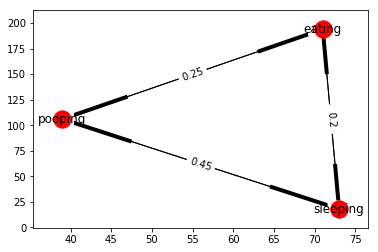

In [42]:
# create graph object
G = nx.MultiDiGraph()
G.add_nodes_from
# nodes correspond to states
G.add_nodes_from(states)
#print(f'Nodes:\n{G.nodes()}\n')

# edges represent transition probabilities
for k, v in edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
#print(f'Edges:')
pprint(G.edges(data=True))    

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos)

# create edge labels for jupyter plot but is not necessary
edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'pet_dog_markov.dot')


Look the file pet_dog_markov.dot to check the transition probabilities.

## What Makes a Markov Model Hidden?

Consider a situation where your dog is acting strangely and you wanted to model the probability that your dog's behavior is due to sickness or simply quirky behavior when otherwise healthy.

In this situation the true state of the dog is unknown, thus hidden from you. One way to model this is to assume that the dog has observable behaviors that represent the true, hidden state. Let's walk through an example.

First we create our state space - healthy or sick. We assume they are equiprobable.  

In [43]:
# create state space and initial state probabilities

hidden_states = ['healthy', 'sick']
pi = [0.5, 0.5]
state_space = pd.Series(pi, index=hidden_states, name='states')
print(state_space)
print('\n', state_space.sum())

healthy    0.5
sick       0.5
Name: states, dtype: float64
('\n', 1.0)


Next we create our transition matrix for the hidden states.

In [44]:
# create hidden transition matrix
# a or alpha 
#   = transition probability matrix of changing states given a state
# matrix is size (M x M) where M is number of states

a_df = pd.DataFrame(columns=hidden_states, index=hidden_states)
a_df.loc[hidden_states[0]] = [0.7, 0.3]
a_df.loc[hidden_states[1]] = [0.4, 0.6]

print(a_df)

a = a_df.values
print('\n', a, a.shape, '\n')
print(a_df.sum(axis=1))


        healthy sick
healthy     0.7  0.3
sick        0.4  0.6
('\n', array([[0.7, 0.3],
       [0.4, 0.6]], dtype=object), (2, 2), '\n')
healthy    1.0
sick       1.0
dtype: float64


This is where it gets a little more interesting. Now we create the emission or observation probability matrix. This matrix is size M x O where M is the number of hidden states and O is the number of possible observable states. 

The emission matrix tells us the probability the dog is in one of the hidden states, given the current, observable state. 

Let's keep the same observable states from the previous example. The dog can be either sleeping, eating, or pooping. For now we make our best guess to fill in the probabilities. 

In [45]:
# create matrix of observation (emission) probabilities
# b or beta = observation probabilities given state
# matrix is size (M x O) where M is number of states 
# and O is number of different possible observations

observable_states = states

b_df = pd.DataFrame(columns=observable_states, index=hidden_states)
b_df.loc[hidden_states[0]] = [0.2, 0.6, 0.2]
b_df.loc[hidden_states[1]] = [0.4, 0.1, 0.5]

print(b_df)

b = b_df.values
print('\n', b, b.shape, '\n')
print(b_df.sum(axis=1))


        sleeping eating pooping
healthy      0.2    0.6     0.2
sick         0.4    0.1     0.5
('\n', array([[0.2, 0.6, 0.2],
       [0.4, 0.1, 0.5]], dtype=object), (2, 3), '\n')
healthy    1.0
sick       1.0
dtype: float64


Now we create the graph edges and the graph object. 

In [46]:
# create graph edges and weights

hide_edges_wts = _get_markov_edges(a_df)
pprint(hide_edges_wts)

emit_edges_wts = _get_markov_edges(b_df)
pprint(emit_edges_wts)


{('healthy', 'healthy'): 0.7,
 ('healthy', 'sick'): 0.3,
 ('sick', 'healthy'): 0.4,
 ('sick', 'sick'): 0.6}
{('healthy', 'eating'): 0.6,
 ('healthy', 'pooping'): 0.2,
 ('healthy', 'sleeping'): 0.2,
 ('sick', 'eating'): 0.1,
 ('sick', 'pooping'): 0.5,
 ('sick', 'sleeping'): 0.4}


Nodes:
{G.nodes()}

Edges:
[('healthy', 'healthy', {'label': 0.7, 'weight': 0.7}),
 ('healthy', 'eating', {'label': 0.6, 'weight': 0.6}),
 ('healthy', 'pooping', {'label': 0.2, 'weight': 0.2}),
 ('healthy', 'sick', {'label': 0.3, 'weight': 0.3}),
 ('healthy', 'sleeping', {'label': 0.2, 'weight': 0.2}),
 ('sick', 'healthy', {'label': 0.4, 'weight': 0.4}),
 ('sick', 'eating', {'label': 0.1, 'weight': 0.1}),
 ('sick', 'pooping', {'label': 0.5, 'weight': 0.5}),
 ('sick', 'sick', {'label': 0.6, 'weight': 0.6}),
 ('sick', 'sleeping', {'label': 0.4, 'weight': 0.4})]


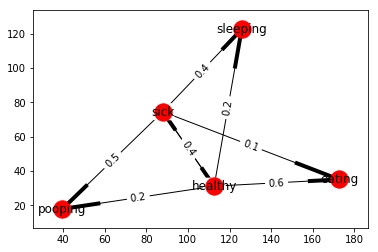

In [47]:
# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(hidden_states)
print('Nodes:\n{G.nodes()}\n')

# edges represent hidden probabilities
for k, v in hide_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)

# edges represent emission probabilities
for k, v in emit_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
    
print('Edges:')
pprint(G.edges(data=True))    

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='neato')
nx.draw_networkx(G, pos)

# create edge labels for jupyter plot but is not necessary
emit_edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=emit_edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'pet_dog_hidden_markov.dot')


The hidden Markov graph is a little more complex but the principles are the same. For example, you would expect that if your dog is eating there is a high probability that it is healthy (60%) and a very low probability that the dog is sick (10%).

Now, what if you needed to discern the health of your dog over time given a sequence of observations?  

In [48]:
# observation sequence of dog's behaviors
# observations are encoded numerically

obs_map = {'sleeping':0, 'eating':1, 'pooping':2}
obs = np.array([1,1,2,1,0,1,2,1,0,2,2,0,1,0,1])

inv_obs_map = dict((v,k) for k, v in obs_map.items())
obs_seq = [inv_obs_map[v] for v in list(obs)]

print( pd.DataFrame(np.column_stack([obs, obs_seq]), 
                columns=['Obs_code', 'Obs_seq']) )


   Obs_code   Obs_seq
0         1    eating
1         1    eating
2         2   pooping
3         1    eating
4         0  sleeping
5         1    eating
6         2   pooping
7         1    eating
8         0  sleeping
9         2   pooping
10        2   pooping
11        0  sleeping
12        1    eating
13        0  sleeping
14        1    eating


Using the Viterbi algorithm we can identify the most likely sequence of hidden states given the sequence of observations.

High level, the Viterbi algorithm increments over each time step, finding the maximum probability of any path that gets to state iat time t, that also has the correct observations for the sequence up to time t.

The algorithm also keeps track of the state with the highest probability at each stage. At the end of the sequence, the algorithm will iterate backwards selecting the state that "won" each time step, and thus creating the most likely path, or likely sequence of hidden states that led to the sequence of observations.

In [53]:
# define Viterbi algorithm for shortest path
# code adapted from Stephen Marsland's, Machine Learning An Algorthmic Perspective, Vol. 2
# https://github.com/alexsosn/MarslandMLAlgo/blob/master/Ch16/HMM.py

def viterbi(pi, a, b, obs):
    
    nStates = np.shape(b)[0]
    T = np.shape(obs)[0]
    
    # init blank path
    path = np.zeros(T)
    # delta --> highest probability of any path that reaches state i
    delta = np.zeros((nStates, T))
    # phi --> argmax by time step for each state
    phi = np.zeros((nStates, T))
    
    # init delta and phi 
    delta[:, 0] = pi * b[:, obs[0]]
    phi[:, 0] = 0

    print('\nStart Walk Forward\n')    
    # the forward algorithm extension
    for t in range(1, T):
        for s in range(nStates):
            delta[s, t] = np.max(delta[:, t-1] * a[:, s]) * b[s, obs[t]] 
            phi[s, t] = np.argmax(delta[:, t-1] * a[:, s])
            print('s={s} and t={t}: phi[{s}, {t}] = {phi}'.format(s=s, t=t, phi=phi[s, t]))
    
    # find optimal path
    print('-'*50)
    print('Start Backtrace\n')
    path[T-1] = np.argmax(delta[:, T-1])
    #p('init path\n    t={} path[{}-1]={}\n'.format(T-1, T, path[T-1]))
    print phi, path
    for t in range(T-2, -1, -1):
        path[t] = phi[int(path[t+1]), t+1]
        #p(' '*4 + 't={t}, path[{t}+1]={path}, [{t}+1]={i}'.format(t=t, path=path[t+1], i=[t+1]))
        print('path[{}] = {}'.format(t, path[t]))
        
    return path, delta, phi

path, delta, phi = viterbi(pi, a, b, obs)
print("\nsingle best state path: \n", path)
print('delta:\n', delta)
print('phi:\n', phi)



Start Walk Forward

s=0 and t=1: phi[0, 1] = 0.0
s=1 and t=1: phi[1, 1] = 0.0
s=0 and t=2: phi[0, 2] = 0.0
s=1 and t=2: phi[1, 2] = 0.0
s=0 and t=3: phi[0, 3] = 0.0
s=1 and t=3: phi[1, 3] = 1.0
s=0 and t=4: phi[0, 4] = 0.0
s=1 and t=4: phi[1, 4] = 0.0
s=0 and t=5: phi[0, 5] = 0.0
s=1 and t=5: phi[1, 5] = 1.0
s=0 and t=6: phi[0, 6] = 0.0
s=1 and t=6: phi[1, 6] = 0.0
s=0 and t=7: phi[0, 7] = 0.0
s=1 and t=7: phi[1, 7] = 1.0
s=0 and t=8: phi[0, 8] = 0.0
s=1 and t=8: phi[1, 8] = 0.0
s=0 and t=9: phi[0, 9] = 0.0
s=1 and t=9: phi[1, 9] = 1.0
s=0 and t=10: phi[0, 10] = 1.0
s=1 and t=10: phi[1, 10] = 1.0
s=0 and t=11: phi[0, 11] = 1.0
s=1 and t=11: phi[1, 11] = 1.0
s=0 and t=12: phi[0, 12] = 1.0
s=1 and t=12: phi[1, 12] = 1.0
s=0 and t=13: phi[0, 13] = 0.0
s=1 and t=13: phi[1, 13] = 0.0
s=0 and t=14: phi[0, 14] = 0.0
s=1 and t=14: phi[1, 14] = 1.0
--------------------------------------------------
Start Backtrace

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  1

Let's take a look at the result. 

In [54]:
state_map = {0:'healthy', 1:'sick'}
state_path = [state_map[v] for v in path]

(pd.DataFrame()
 .assign(Observation=obs_seq)
 .assign(Best_Path=state_path))


,Observation,Best_Path
0,eating,healthy
1,eating,healthy
2,pooping,healthy
3,eating,healthy
4,sleeping,healthy
5,eating,healthy
6,pooping,healthy
7,eating,healthy
8,sleeping,sick
9,pooping,sick


## A Hidden Markov Model for Regime Detection

Application of hidden Markov models to quantitative finance.

Consider that the largest hurdle we face when trying to apply predictive techniques to asset returns is nonstationary time series.  In brief, this means that the expected mean and volatility of asset returns changes over time. 

Most time series models assume that the data is stationary. This is a major weakness of these models. 

Instead, let us frame the problem differently. We know that time series exhibit temporary periods where the expected means and variances are stable through time. These periods or regimes can be likened to hidden states.

If that's the case, then all we need are observable variables whose behavior allows us to infer the true hidden state(s). If we can better estimate an asset's most likely regime, including the associated means and variances, then our predictive models become more adaptable and will likely improve. We can also become better risk managers as the estimated regime parameters gives us a great framework for better scenario analysis.  

In this example, the observable variables I use are: the underlying asset returns, the Ted Spread, the 10 year - 2 year constant maturity spread, and the 10 year - 3 month constant maturity spread.

In [65]:
import pandas as pd
import pandas_datareader.data as web
import sklearn.mixture as mix

import numpy as np
import scipy.stats as scs

import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
%matplotlib inline

import seaborn as sns
import missingno as msno
#from tqdm import tqdm


            TEDRATE  T10Y2Y  T10Y3M        SPY      sret
2002-01-02     0.15    1.98    3.46  84.824844 -0.011275
2002-01-03     0.18    1.97    3.43  85.786682 -0.006654
2002-01-04     0.18    1.99    3.46  86.359367  0.007082
2002-01-07     0.22    2.01    3.41  85.749954  0.002314
2002-01-08     0.19    2.03    3.42  85.551720  0.008187


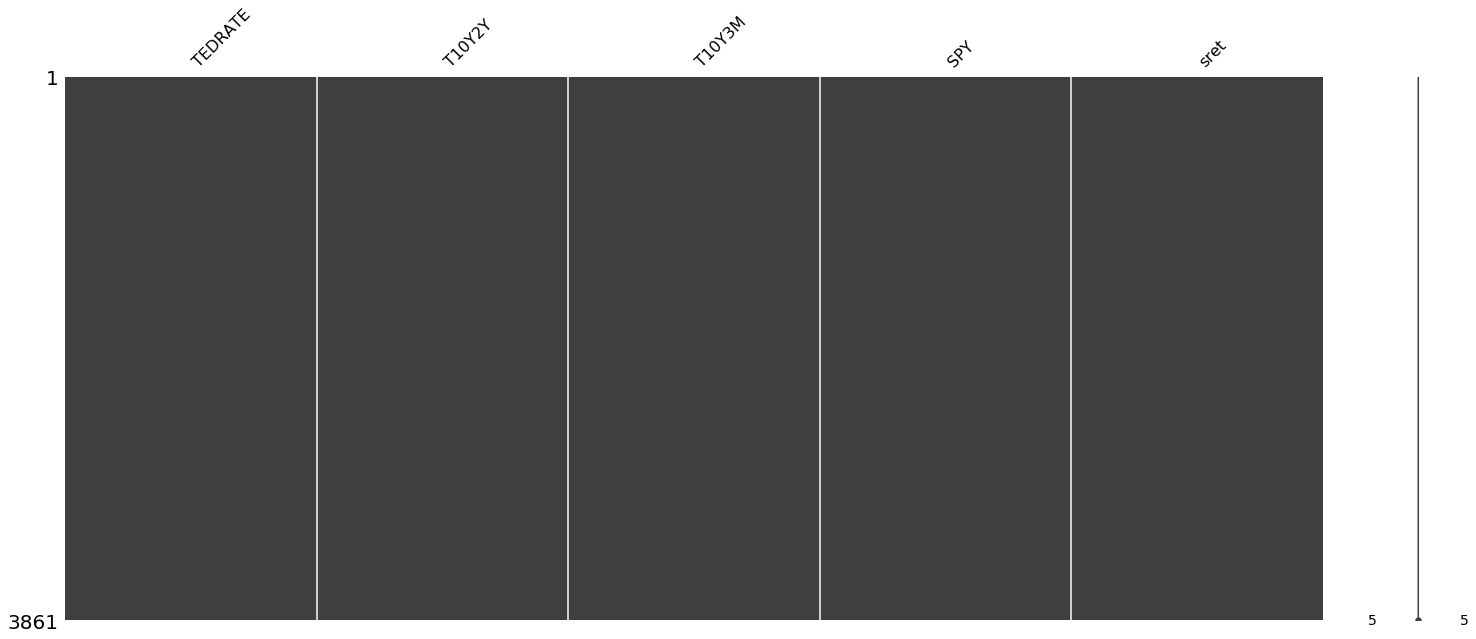

In [66]:
# get fed data

f1 = 'TEDRATE' # ted spread
f2 = 'T10Y2Y' # constant maturity ten yer - 2 year
f3 = 'T10Y3M' # constant maturity 10yr - 3m

start = pd.to_datetime('2002-01-01')
end = pd.datetime.today()

mkt = 'SPY'
MKT = (web.DataReader([mkt], 'yahoo', start, end)['Adj Close']
       .rename(columns={mkt:mkt})
       .assign(sret=lambda x: np.log(x[mkt]/x[mkt].shift(1)))
       .dropna())

data = (web.DataReader([f1, f2, f3], 'fred', start, end)
        .join(MKT, how='inner')
        .dropna()
       )

print(data.head())

# gives us a quick visual inspection of the data
msno.matrix(data)


Next we will use the sklearn's GaussianMixture to fit a model that estimates these regimes. We will explore mixture models  in more depth in part 2 of this series. The important takeaway is that mixture models implement a closely related unsupervised form of density estimation. It makes use of the expectation-maximization algorithm to estimate the means and covariances of the hidden states (regimes). For now, it is ok to think of it as a magic button for guessing the transition and emission probabilities, and most likely path. 

We have to specify the number of components for the mixture model to fit to the time series. In this example the components can be thought of as regimes. We will arbitrarily classify the regimes as High, Neutral and Low Volatility and set the number of components to three.

/home/ajaque/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Means and vars of each hidden state
0th hidden state
('mean = ', array([  2.65240662e-01,   1.79719846e+00,   2.34205926e+00,
        -6.94426769e-04]))
('var = ', array([  9.24622390e-03,   4.36518227e-01,   5.66535009e-01,
         7.30385571e-05]))
()
1th hidden state
('mean = ', array([  1.00290642e+00,   1.62393735e+00,   2.25507202e+00,
         1.25618944e-03]))
('var = ', array([  5.50354464e-01,   3.05722431e-01,   8.73282717e-01,
         4.68508403e-04]))
()
2th hidden state
('mean = ', array([ 0.49014011,  0.00703705, -0.01385194, -0.00063712]))
('var = ', array([  1.22261468e-02,   1.12598036e-02,   1.28807934e-01,
         4.12413005e-05]))
()


/home/ajaque/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'courier prime code'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


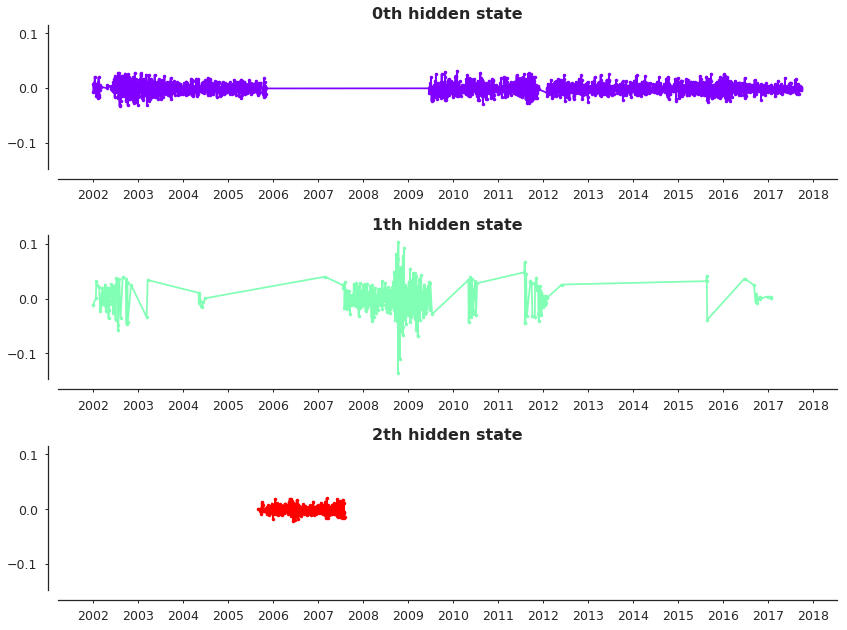

In [67]:
# code adapted from http://hmmlearn.readthedocs.io
# for sklearn 18.1

col = 'sret'
select = data.ix[:].dropna()

ft_cols = [f1, f2, f3, 'sret']
X = select[ft_cols].values

model = mix.GaussianMixture(n_components=3, 
                            covariance_type="full", 
                            n_init=100, 
                            random_state=7).fit(X)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X)

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covariances_[i]))
    print()

sns.set(font_scale=1.25)
style_kwds = {'xtick.major.size': 3, 'ytick.major.size': 3,
              'font.family':u'courier prime code', 'legend.frameon': True}
sns.set_style('white', style_kwds)

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True, figsize=(12,9))
colors = cm.rainbow(np.linspace(0, 1, model.n_components))

for i, (ax, color) in enumerate(zip(axs, colors)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(select.index.values[mask],
                 select[col].values[mask],
                 ".-", c=color)
    ax.set_title("{0}th hidden state".format(i), fontsize=16, fontweight='demi')

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())
    sns.despine(offset=10)

plt.tight_layout()
fig.savefig('Hidden Markov (Mixture) Model_Regime Subplots.png')


In the above image, I've highlighted each regime's daily expected mean and variance of SPY returns. It appears the 1th hidden state is our low volatility regime. Note that the 1th hidden state has the largest expected return and the smallest variance.The 0th hidden state is the neutral volatility regime with the second largest return and variance. Lastly the 2th hidden state is high volatility regime. We can see the expected return is negative and the variance is the largest of the group. 

        Date  states  TEDRATE  T10Y2Y  T10Y3M        SPY      sret  mkt_cret
0 2002-01-02       1     0.15    1.98    3.46  84.824844 -0.011275 -0.011275
1 2002-01-03       0     0.18    1.97    3.43  85.786682 -0.006654 -0.017929
2 2002-01-04       0     0.18    1.99    3.46  86.359367  0.007082 -0.010847
3 2002-01-07       0     0.22    2.01    3.41  85.749954  0.002314 -0.008533
4 2002-01-08       0     0.19    2.03    3.42  85.551720  0.008187 -0.000346


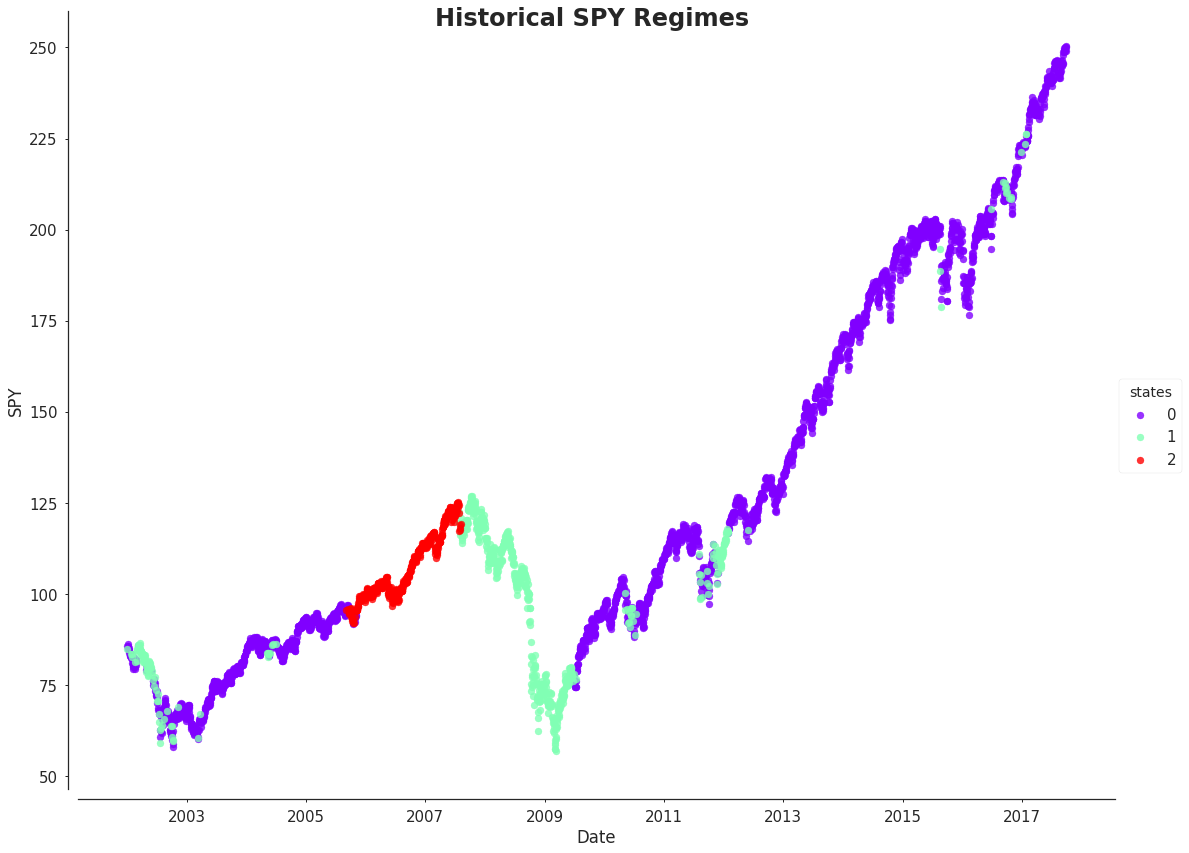

In [70]:
sns.set(font_scale=1.5)
states = (pd.DataFrame(hidden_states, columns=['states'], index=select.index)
          .join(select, how='inner')
          .assign(mkt_cret=select.sret.cumsum())
          .reset_index(drop=False)
          .rename(columns={'index':'Date'}))
print(states.head())

sns.set_style('white', style_kwds)
order = [0, 1, 2]
fg = sns.FacetGrid(data=states, hue='states', hue_order=order,
                   palette=colors, aspect=1.31, size=12)
fg.map(plt.scatter, 'Date', mkt, alpha=0.8).add_legend()
sns.despine(offset=10)
fg.fig.suptitle('Historical SPY Regimes', fontsize=24, fontweight='demi')
fg.savefig('Hidden Markov (Mixture) Model_SPY Regimes.png')

Here is the SPY price chart with the color coded regimes overlaid. 

### References
This notebook is based on HMM <a href="http://www.blackarbs.com/blog/introduction-hidden-markov-models-python-networkx-sklearn/2/9/2017">Tutorial</a> by Brian Christopher

Additional packages implemented HMM in python may be founded in:
<ul>
<li>https://bitbucket.org/GuyZ/hmm
<li>https://github.com/hmmlearn/hmmlearn with its tutorial http://hmmlearn.readthedocs.io/en/stable/tutorial.html
<li>https://pypi.python.org/pypi/hmms
<li>https://github.com/lopatovsky/HMMs
</ul>